# Analyse Moeilijk

1.Importeer nodige bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

2. Lees de dataFrame

In [4]:
data = pd.read_csv('wedstrijden.csv', sep=';')


3. Converteer de Seizoen kolom zodat die meer presentatief is op de grafiek

In [5]:
# Convert 'Seizoen' column to a more readable format
data['Seizoen'] = data['Seizoen'].str.replace('/', '-')

4. Berekent het gemiddelede per seizoen en groepeerd ze per seizoen

In [6]:
data['TotalGoals'] = data['FinaleStandThuisploeg'] + data['FinaleStandUitploeg']

seasonal_averages = data.groupby('Seizoen')['TotalGoals'].mean()

5. Maak de grafiek aan.

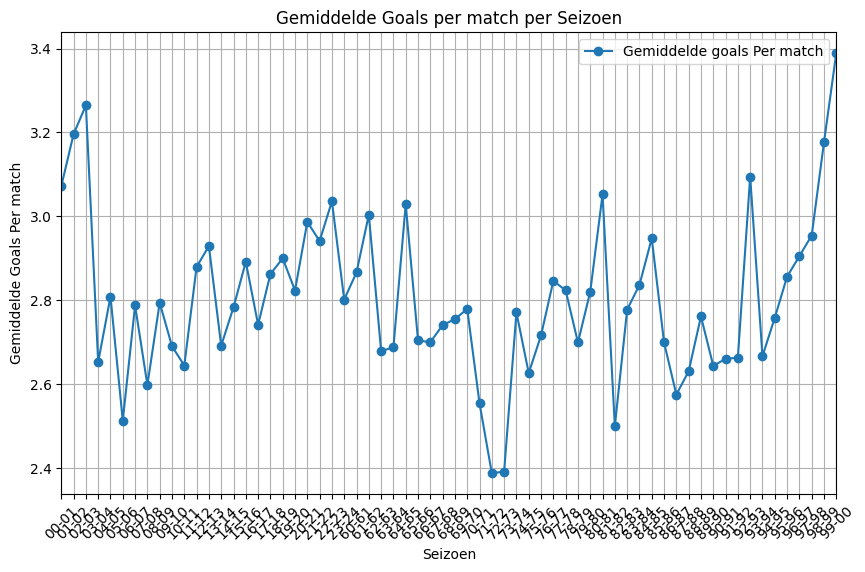

In [25]:
# Plot line graph
plt.figure(figsize=(10,6))
plt.plot(seasonal_averages.index, seasonal_averages.values, label='Gemiddelde goals Per match', marker='o')
plt.xlabel('Seizoen')
plt.ylabel('Gemiddelde Goals Per match')
plt.title('Gemiddelde Goals per match per Seizoen')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show data from 1960 to last season
first_season = seasonal_averages.index[0]
last_season = seasonal_averages.index[-1]
plt.xlim(left=first_season, right=last_season)

plt.show()

6. Bereken de gemiddelde van recent en historische data

In [27]:
historical_data = data[data['Seizoen'] <= '2016-2017']
recent_data = data[data['Seizoen'] >= '2017-2018']

mean_historical = historical_data['TotalGoals'].mean()
mean_recent = recent_data['TotalGoals'].mean()

7. Gegeven waarden

In [28]:
# Given values
std_dev = historical_data['TotalGoals'].std()
alpha = 0.05         # level of significance
sample_size = len(recent_data)      # number of matches


8. Region of Rejection

In [29]:
z_critical = norm.ppf(1 - alpha)
rejection_boundary = mean_historical + z_critical * (std_dev / (sample_size ** 0.5))

9. Type I Error

In [30]:
# Probability of Type I Error
prob_type_I_error = alpha

10. Kijkt of er een significant verschil is tussen de dataframes

In [31]:
# Determine if there is a significant difference
if mean_recent > rejection_boundary:
    print("There is a significant increase in the average number of goals per match in recent years.")
elif mean_recent < mean_historical:
    print("There is a significant decrease in the average number of goals per match in recent years.")
else:
    print("There is no significant difference in the average number of goals per match between the historical and recent data.")

print(f"Average goals per match (historical): {mean_historical:.3f}")
print(f"Average goals per match (recent): {mean_recent:.3f}")
print(f"Region of Rejection: Average goals per match > {rejection_boundary:.3f}")
print(f"Probability of Type I Error: {prob_type_I_error * 100}%")

# Add more recent seasons
more_recent_data = data[data['Seizoen'] >= '2020-2021']
mean_more_recent = more_recent_data['TotalGoals'].mean()

print(f"Average goals per match (more recent): {mean_more_recent:.3f}")

There is a significant decrease in the average number of goals per match in recent years.
Average goals per match (historical): 2.837
Average goals per match (recent): 2.793
Region of Rejection: Average goals per match > 2.862
Probability of Type I Error: 5.0%
Average goals per match (more recent): 2.793
